In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

## 統計量の計算方法

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [3]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [4]:
dframe =DataFrame(arr, index=['A','B'],columns=['1','2','3'])

In [5]:
dframe

,1,2,3
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [6]:
dframe.sum()
#axis =0が省略されている

1    1.0
2    5.0
3    4.0
dtype: float64

In [7]:
dframe.sum(axis = 1)

A    3.0
B    7.0
dtype: float64

In [8]:
dframe.min()
# 列の最小値

1    1.0
2    2.0
3    4.0
dtype: float64

In [9]:
dframe.min(axis=1)
# 行の最小値

A    1.0
B    3.0
dtype: float64

In [10]:
dframe.idxmin()

1    A
2    A
3    B
dtype: object

In [11]:
dframe.idxmin(axis=1)

A    1
B    2
dtype: object

In [12]:
dframe.cumsum()

,1,2,3
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [13]:
dframe.describe()

,1,2,3
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [14]:
import pandas_datareader.data as pdweb

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [15]:
import datetime

In [16]:
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],
                                                         start= datetime.datetime(2020,1,1),
                                                         end  = datetime.datetime(2020,5,29))['Adj Close']
# adj closeは終値

In [17]:
prices.tail(15)

Symbols,CVX,XOM,BP
Date,,,
2020-05-08,94.088707,45.301632,24.030001
2020-05-11,92.019089,44.870003,23.500000
2020-05-12,89.781929,44.119999,23.059999
2020-05-13,87.416649,41.930000,22.230000
2020-05-14,88.747124,42.299999,22.139999
2020-05-15,87.870003,42.000000,21.820000
2020-05-18,92.550003,45.340000,23.510000
2020-05-19,89.620003,43.939999,22.910000
2020-05-20,93.000000,45.369999,23.620001


In [18]:
rets = prices.pct_change()

In [19]:
rets

Symbols,CVX,XOM,BP
Date,,,
2019-12-31,NaN,NaN,NaN
2020-01-02,0.007634,0.016051,0.010599
2020-01-03,-0.003459,-0.008040,0.018091
2020-01-06,-0.003388,0.007678,0.026268
2020-01-07,-0.012770,-0.008184,-0.010539
...,...,...,...
2020-05-22,-0.019122,0.000898,-0.017109
2020-05-26,0.033452,0.029372,0.012185
2020-05-27,0.006431,0.007188,0.028805


In [20]:
%matplotlib inline

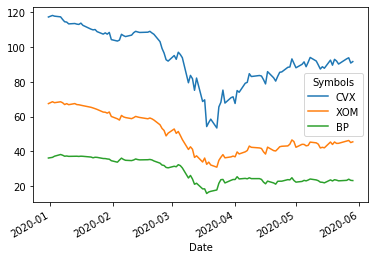

In [21]:
prices.plot()

In [22]:
rets.corr()

Symbols,CVX,XOM,BP
Symbols,,,
CVX,1.000000,0.855056,0.859646
XOM,0.855056,1.000000,0.839098
BP,0.859646,0.839098,1.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

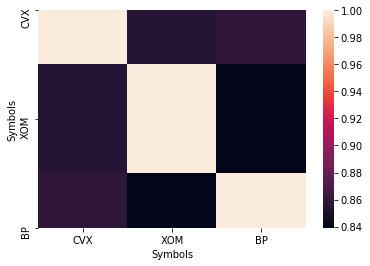

In [25]:
sns.heatmap(rets.corr())